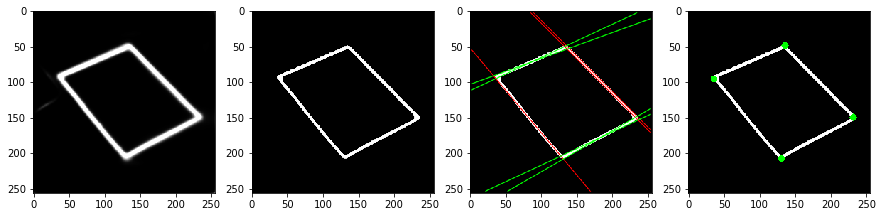

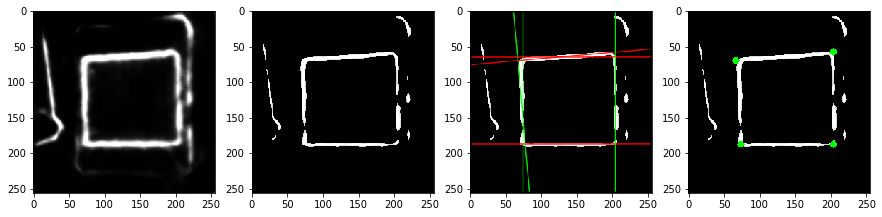

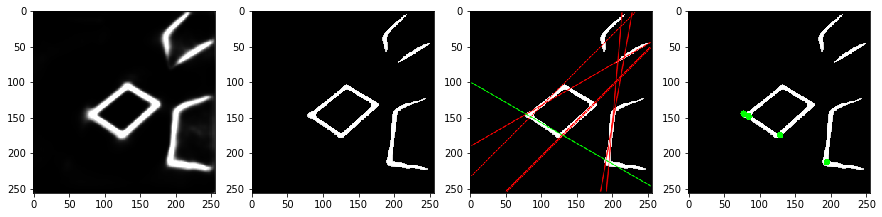

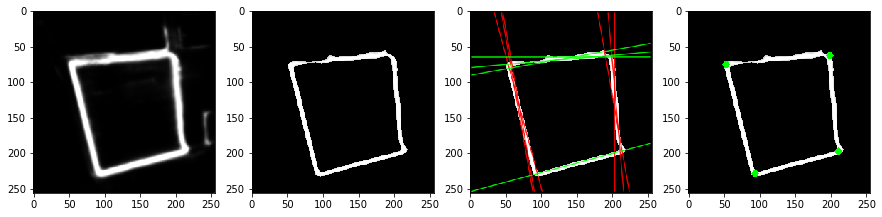

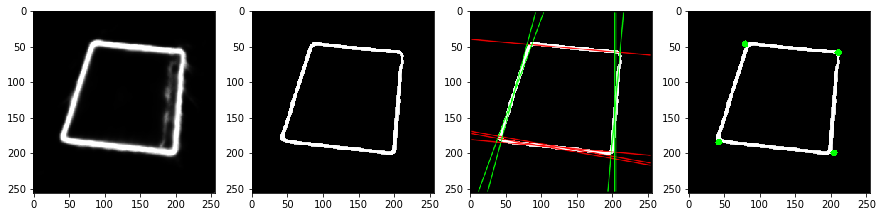

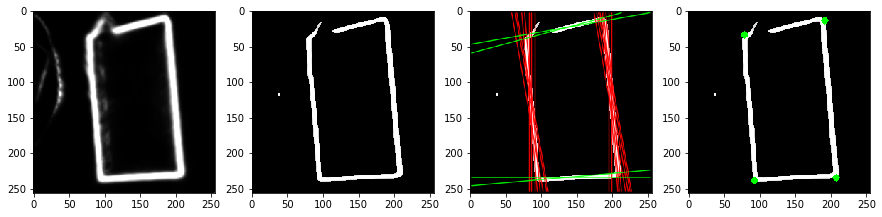

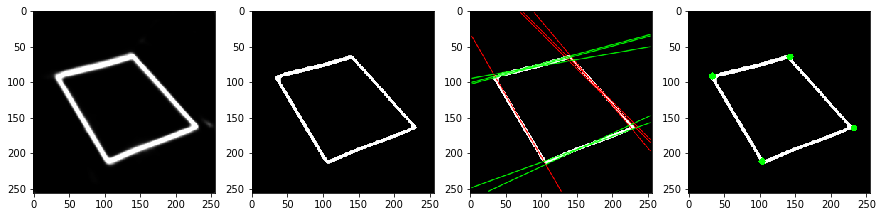

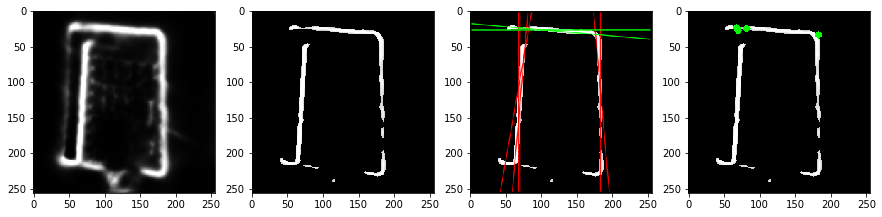

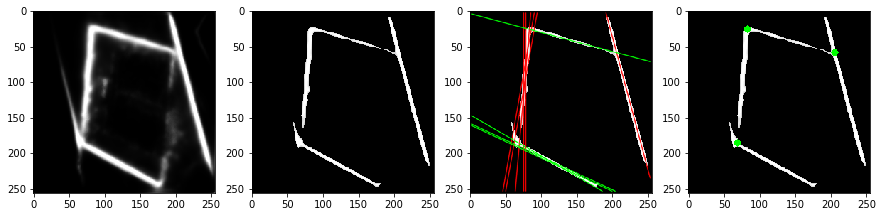

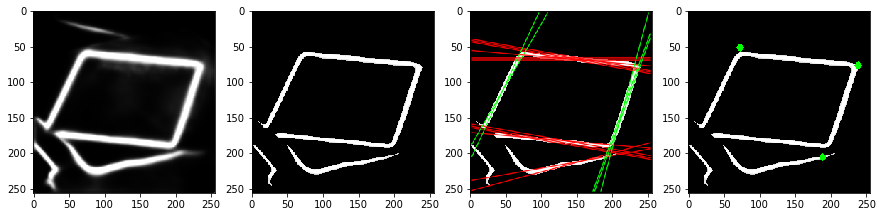

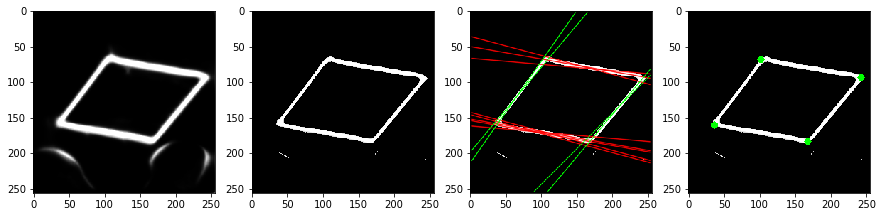

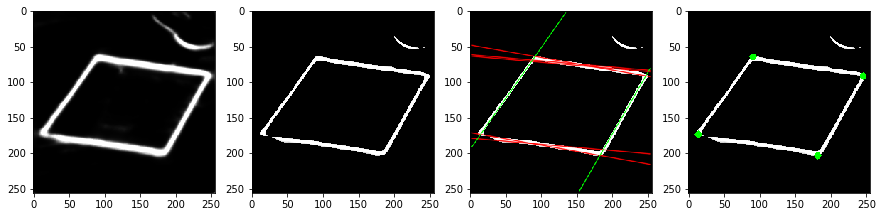

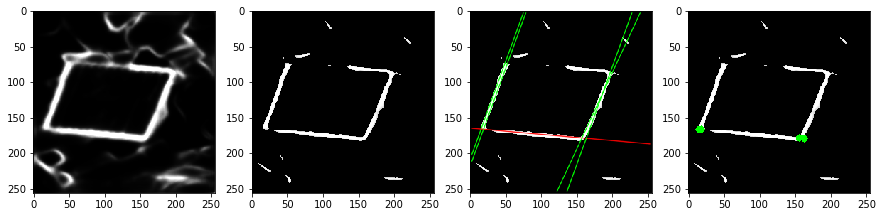

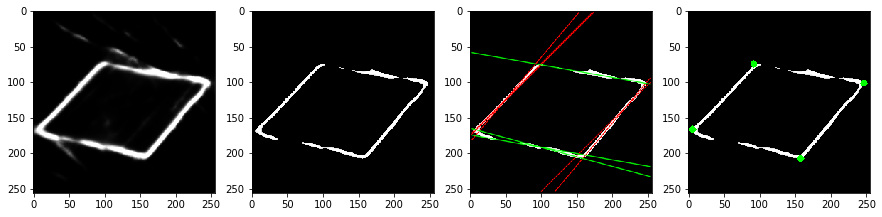

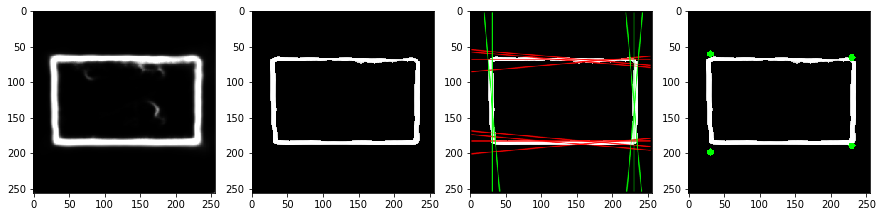

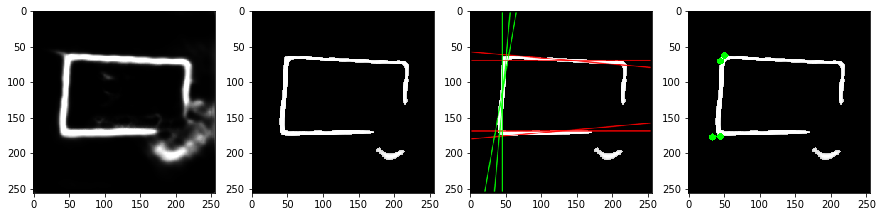

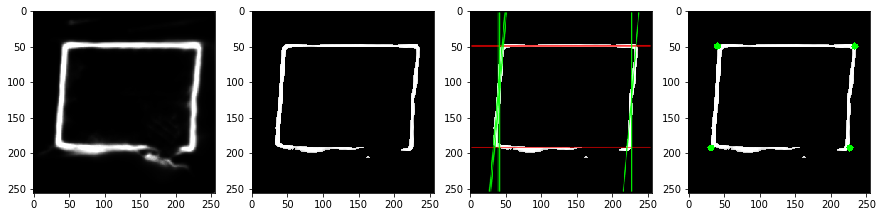

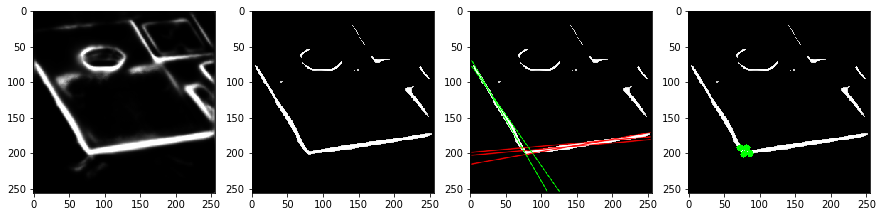

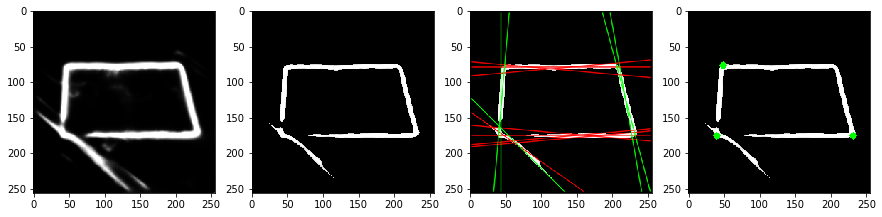

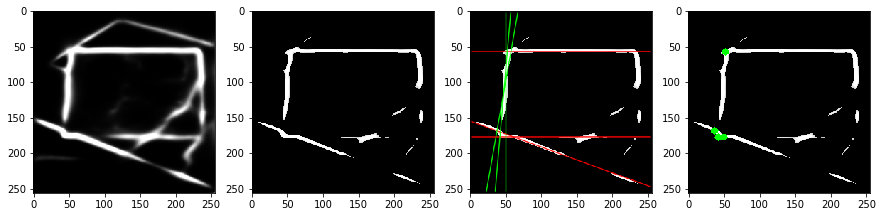

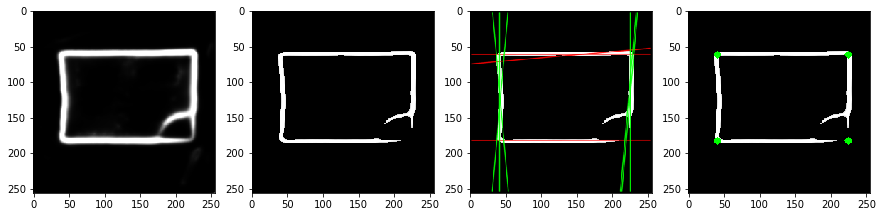

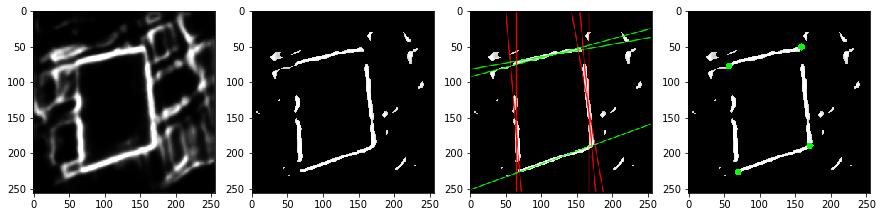

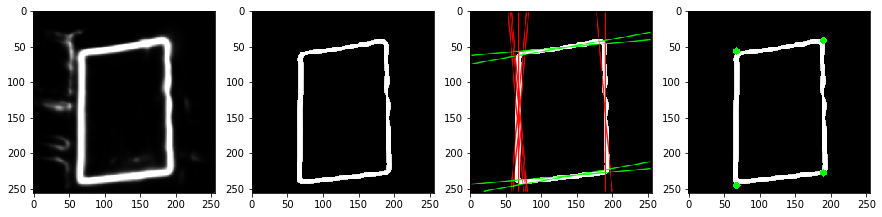

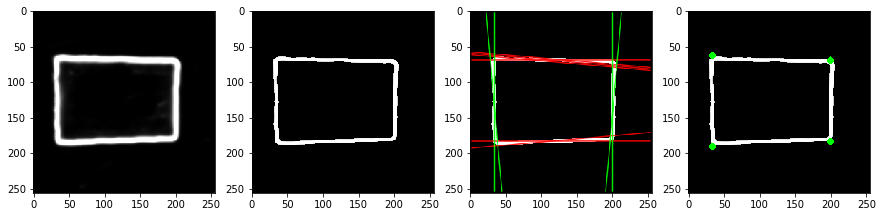

In [179]:
from koda import scan
from matplotlib import pyplot as plt
import cv2
import numpy as np
%matplotlib inline

noise_th = 200
erosion_kernel = (7, 7)
erorion_iterations = 2
hough_th = 80
hough_lines_limit = 30
hough_res=(1, np.pi/36)

for i in range(24):
    fig, axes = plt.subplots(1, 4, figsize=(15,15))
    file = 'CNN-test/IMG_%d.png' % i
    img = cv2.imread(file, 0)
    axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))

    img[img < noise_th] = 0
    #img = cv2.medianBlur(img, 13)  
    img = cv2.erode(img, erosion_kernel, iterations=erorion_iterations)  
    #img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, (13, 13))
    axes[1].imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
    corners, lines = scan.detect_corners(img, hough_th, hough_lines_limit, hough_res)

    im_lines = cv2.cvtColor(img.copy(), cv2.COLOR_GRAY2BGR) 
    color = [(0,0,255), (0,255,0)]
    for i, lines in enumerate(lines):
        for rho, theta in lines:
            x = np.cos(theta)
            y = np.sin(theta)
            x0, y0 = x*rho, y*rho
            pt1 = ( int(x0+1000*(-y)), int(y0+1000*(x)) )
            pt2 = ( int(x0-1000*(-y)), int(y0-1000*(x)) )
            cv2.line(im_lines, pt1, pt2, color[i], 1, cv2.LINE_AA)
    axes[2].imshow(cv2.cvtColor(im_lines, cv2.COLOR_BGR2RGB))    

    im_corners = cv2.cvtColor(img.copy(), cv2.COLOR_GRAY2BGR)
    for x,y in corners:
        cv2.circle(im_corners, (x,y), 2, (0, 255, 0), 6)
    axes[3].imshow(cv2.cvtColor(im_corners, cv2.COLOR_BGR2RGB))
    plt.show()